In [1]:
## Credit Card Fraud Detection using SVM

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import os
from sklearn import svm
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, precision_recall_curve, recall_score,f1_score,accuracy_score
from sklearn.metrics import auc, average_precision_score, roc_curve, roc_auc_score




In [2]:
creditData = pd.read_csv ("creditcard.csv")
print(creditData.shape)

(284807, 31)


In [3]:
print(creditData.describe())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [4]:
creditData.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Check null values in data
creditData.isnull().values.any()

False

Text(0, 0.5, 'Frequency')

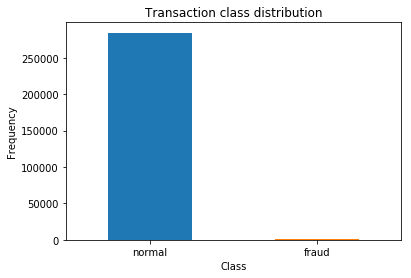

In [6]:
#Bar plot normal and fraud transactions:
labels = ['normal','fraud']
classes = pd.value_counts(creditData['Class'], sort = True)
classes
classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

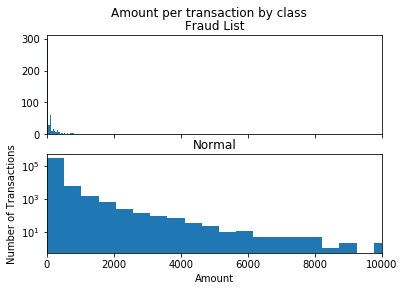

In [7]:
#Plot Amount for Normal and Fraud class
fraud = creditData[creditData.Class == 1]
normal = creditData[creditData.Class == 0]
# Amount vs Class
f, (ax1, ax2) = plt.subplots(2,1,sharex=True)
f.suptitle('Amount per transaction by class')
ax1.hist(fraud.Amount, bins = 50)
ax1.set_title('Fraud List')
ax2.hist(normal.Amount, bins = 50)
ax2.set_title('Normal')
plt.xlabel('Amount')
plt.ylabel('Number of Transactions')
plt.xlim((0, 10000))
plt.yscale('log')
plt.show()

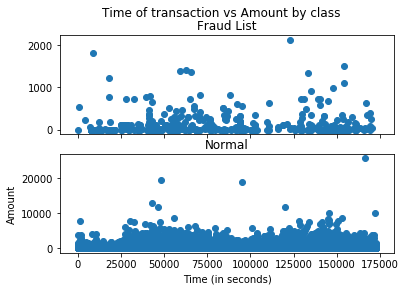

In [8]:
# Plot time vs Amount
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud List')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in seconds)')
plt.ylabel('Amount')
plt.show()

In [9]:
#Data-Reshaping
creditData['scaled_amount'] = StandardScaler().fit_transform(creditData['Amount'].values.reshape(-1, 1))
y=creditData['Class']
X=creditData.drop(['Time','Amount', 'Class'],axis=1)

print (X.head())
print(y.head())

         V1        V2        V3        V4        V5        V6        V7  \
0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9       V10      ...             V20       V21       V22  \
0  0.098698  0.363787  0.090794      ...        0.251412 -0.018307  0.277838   
1  0.085102 -0.255425 -0.166974      ...       -0.069083 -0.225775 -0.638672   
2  0.247676 -1.514654  0.207643      ...        0.524980  0.247998  0.771679   
3  0.377436 -1.387024 -0.054952      ...       -0.208038 -0.108300  0.005274   
4 -0.270533  0.817739  0.753074      ...        0.408542 -0.009431  0.798278   

        V23       V24       V25       V26       V27       V28  scale

In [10]:
# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [11]:
# Print the Dimensions of the train and test data
print("X_train.shape: ", X_train.shape)
print("X_test.shape: ", X_test.shape)
print("y_train.shape: ", y_train.shape)
print("y_test.shape: ", y_test.shape)


X_train.shape:  (199364, 29)
X_test.shape:  (85443, 29)
y_train.shape:  (199364,)
y_test.shape:  (85443,)


In [12]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,scaled_amount
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.161761
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.345313
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.326845
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.329401
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.006398


In [13]:
y_train.head()

161145    0
204520    0
182659    0
25117     0
227642    0
Name: Class, dtype: int64

In [14]:
# Train the classifier using the rbf kernel and build the model.

classifier= svm.SVC(C= 1, gamma='auto', kernel='rbf', random_state= 100)

#Fit the Model
classifier.fit(X_train, y_train)

#Prediction using the test dataset
y_pred = classifier.predict(X_test)

average_precision = average_precision_score(y_test, y_pred)
cls_report = classification_report(y_test, y_pred)

In [15]:
#Print Output Summary:

print("Output Summary:")
print("------------------------------------")
print("Precision score: ", precision_score(y_test,y_pred))
print("Recall score: ", recall_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC Area under the curve: {}".format(roc_auc_score(y_test, y_pred)))
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))

Output Summary:
------------------------------------
Precision score:  0.9484536082474226
Recall score:  0.6258503401360545
F1 score:  0.7540983606557377
Accuracy score:  0.9992977774656788
ROC Area under the curve: 0.8128958603700344
Area under the curve : 0.812896
Average precision-recall score RF: 0.594233717314712


In [16]:
print("-----------------------------------------------------------------")
print(confusion_matrix)
print("------------------------------------------------------------------")
print(cls_report)
print("------------------------------------------------------------------")

-----------------------------------------------------------------
<function confusion_matrix at 0x000002730218E488>
------------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.95      0.63      0.75       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.97      0.81      0.88     85443
weighted avg       1.00      1.00      1.00     85443

------------------------------------------------------------------


C:\Users\Karthik\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


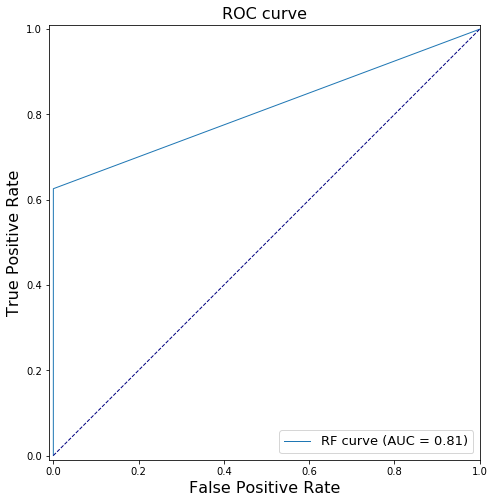

In [17]:
# Plot Area under the curve:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='lower right', fontsize=13)
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--')
plt.axes().set_aspect('equal')
plt.show()

In [18]:
#We train the classifier using the linear kernel to check if the model improves with better accuracy.

classifier= svm.SVC(C= 1, kernel= 'linear', random_state= 100)

#Model fitting
classifier.fit(X_train, y_train)

#Test data prediction 
y_pred = classifier.predict(X_test)

confusion_matrix = confusion_matrix(y_test, y_pred)
print("-----------------------------------------------------------------")
print(confusion_matrix)
print("-----------------------------------------------------------------")

Report = classification_report(y_test, y_pred)
print("-----------------------------------------------------------------")
print(Report)
print("-----------------------------------------------------------------")



-----------------------------------------------------------------
[[85274    22]
 [   33   114]]
-----------------------------------------------------------------
-----------------------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.84      0.78      0.81       147

   micro avg       1.00      1.00      1.00     85443
   macro avg       0.92      0.89      0.90     85443
weighted avg       1.00      1.00      1.00     85443

-----------------------------------------------------------------


In [19]:
#Print Output Summary:

print("Output Summary:")
print("------------------------------------")
print("Recall score: ", recall_score(y_test,y_pred))
print("Precision score: ", precision_score(y_test,y_pred))
print("F1 score: ", f1_score(y_test,y_pred))
print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("ROC Area under the curve: {}".format(roc_auc_score(y_test, y_pred)))
print("Area under the curve : %f" % (roc_auc_score(y_test, y_pred)))
print("Average precision-recall score RF: {}".format(average_precision))

Output Summary:
------------------------------------
Recall score:  0.7755102040816326
Precision score:  0.8382352941176471
F1 score:  0.8056537102473498
Accuracy score:  0.9993562960102056
ROC Area under the curve: 0.8876261393696477
Area under the curve : 0.887626
Average precision-recall score RF: 0.594233717314712


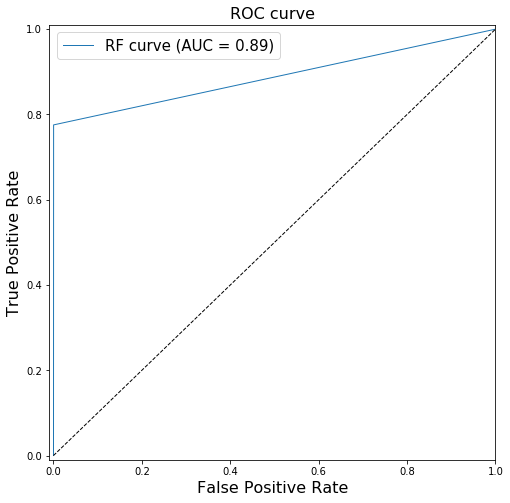

In [20]:
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred)
roc_auc_rf = auc(fpr_rf, tpr_rf)
plt.figure(figsize=(8,8))
plt.xlim([-0.01, 1.00])
plt.ylim([-0.01, 1.01])
plt.plot(fpr_rf, tpr_rf, lw=1, label='{} curve (AUC = {:0.2f})'.format('RF',roc_auc_rf))

plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('ROC curve', fontsize=16)
plt.legend(loc='upper left', fontsize=15)
plt.plot([0, 1], [0, 1], color='black', lw=1, linestyle='--')
plt.show()